In [2]:

import tensorflow as tf

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.tree import export_graphviz
tf.debugging.set_log_device_placement(True)

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  2


In [4]:
import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

Using TensorFlow backend.


In [5]:

from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

10.0
7.6


In [6]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 973705560054295603, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10879648388384095325
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15620961694886132288
 physical_device_desc: "device: 1, name: GeForce RTX 2070, pci bus id: 0000:65:00.0, compute capability: 7.5"]

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline


import datetime, os

from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.model_selection import train_test_split

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

In [8]:
data = pd.read_csv('final_project.csv', header = None, skiprows = [0], )

In [11]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [12]:
data.info()

In [13]:
data.boxplot(grid = False,figsize=(40,20)) #figsize=(Width,Height)

In [14]:
data.y.unique()

In [15]:
data_zero = data[data['y']== 0]
data_one = data[data['y']== 1]

In [16]:
data_zero.boxplot(grid = False, figsize=(40,20)) #figsize=(Width,Height)

[SVM], Logistic; random forrest, naive bayes, XGBoost, [DN]

In [17]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc
 


In [18]:
x1 = df.drop([50], axis = 1)


In [19]:
y = df[50]

In [20]:
y = y.to_numpy()

In [21]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
import re

In [23]:
x1.dtypes
print(x1[1:50][3])

1      4.152333
2      6.586874
3      3.637307
4      1.676758
5      5.182092
6     -0.930500
7    -13.374530
8      4.718855
9     -0.796302
10     0.104432
11     2.604201
12     3.798925
13    -5.688358
14   -22.074013
15     5.535042
16     1.282171
17     2.582833
18     2.027941
19    -0.209906
20     3.994230
21   -14.565122
22     6.385889
23     1.041696
24    -4.087241
25    -0.574695
26    -7.931013
27    13.497621
28    -3.227753
29   -12.936755
30    12.998583
31    -0.806205
32   -11.156008
33    -5.090650
34     2.644812
35    -7.270383
36     2.056062
37    -1.502662
38     0.744331
39    -5.129643
40     0.333339
41     5.819900
42    -3.865066
43     1.393440
44    23.779610
45    -4.622862
46     1.334108
47    18.663702
48    -3.980340
49     4.062733
Name: 3, dtype: float64


In [24]:
x1[29] = pd.to_numeric(x1[29], errors = 'coerce')
x1[30] = pd.to_numeric(x1[30], errors = 'coerce')
x1[32] = pd.to_numeric(x1[32], errors = 'coerce')
x1[37] = pd.to_numeric(x1[37], errors = 'coerce')


In [25]:
for i in range(50):
    x1[i] = pd.to_numeric(x1[i], errors = 'coerce')
print(x1.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
dtype: object


In [26]:
x1.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,88.824477,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604


In [27]:
x1[32].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 32, dtype: float64

In [28]:
for i in range(50):
    x1[i].fillna(0, inplace = True)
print(x1.describe())


                  0              1              2              3   \
count  160000.000000  160000.000000  160000.000000  160000.000000   
mean       -0.001028       0.001358      -1.149871      -0.024632   
std         0.371107       6.340137      13.271916       8.064099   
min        -1.592635     -26.278302     -59.394048     -35.476594   
25%        -0.251574      -4.260377     -10.163721      -5.452183   
50%        -0.001980       0.004056      -1.336542      -0.028386   
75%         0.248505       4.282958       7.868661       5.443760   
max         1.600849      27.988178      63.545653      38.906025   

                  4              5              6              7   \
count  160000.000000  160000.000000  160000.000000  160000.000000   
mean       -0.000549       0.013578      -1.670399      -7.691497   
std         6.381775       7.669189      19.297108      30.539850   
min       -28.467536     -33.822988     -86.354483    -181.506976   
25%        -4.312029      -5.1471

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

In [30]:
from keras.applications import Xception
from keras.utils import multi_gpu_model

In [31]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [32]:
with mirrored_strategy.scope():
    model_final = tf.keras.Sequential()
    model_final.add(layers.Dense(300, input_dim = 50, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(1, activation = 'sigmoid'))
    
    model_final.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01, decay = 0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
    
    log_dir = 'final_logs'
    tb_random = TensorBoard(log_dir=log_dir, histogram_freq=1)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op LogicalNot in device /job:localho

In [33]:
with mirrored_strategy.scope():

    x_train, x_test, y_train, y_test = train_test_split(x1.values, y, test_size=0.20, random_state=102)

In [34]:
print(x_train.dtype)

float64


In [85]:
with mirrored_strategy.scope():

    history = model_final.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=100, callbacks=[tb_random])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Parall

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Executing op __inference_initialize_variables_2682 in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /jo

128000/128000 [==============================] - 7s 53us/sample - loss: 0.1575 - accuracy: 0.9474 - val_loss: 0.1715 - val_accuracy: 0.9517
Epoch 95/100
128000/128000 [==============================] - 7s 53us/sample - loss: 0.1575 - accuracy: 0.9473 - val_loss: 0.1539 - val_accuracy: 0.9561
Epoch 96/100
128000/128000 [==============================] - 7s 53us/sample - loss: 0.1558 - accuracy: 0.9472 - val_loss: 0.1923 - val_accuracy: 0.9408
Epoch 97/100
128000/128000 [==============================] - 7s 53us/sample - loss: 0.1538 - accuracy: 0.9482 - val_loss: 0.1844 - val_accuracy: 0.9478
Epoch 98/100
128000/128000 [==============================] - 7s 52us/sample - loss: 0.1523 - accuracy: 0.9483 - val_loss: 0.1674 - val_accuracy: 0.9523
Epoch 99/100
128000/128000 [==============================] - 7s 52us/sample - loss: 0.1532 - accuracy: 0.9485 - val_loss: 0.1793 - val_accuracy: 0.9498
Epoch 100/100
128000/128000 [==============================] - 7s 52us/sample - loss: 0.1539 - 

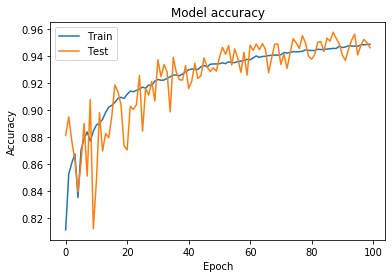

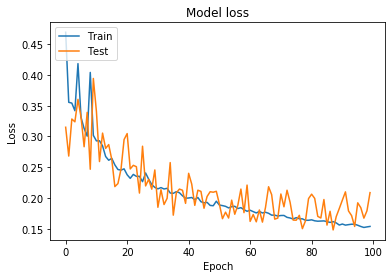

In [86]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# these are pretty good results.

# Now, let's try a SVM with different kernels (sigmoid, Gaussian, linear, and polynomial)

## polynomial first

In [35]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x1.values, y, test_size=0.20, random_state=102)

In [ ]:
poly_svclassifier = SVC(kernel='poly', degree=8)
poly_svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = poly_svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gaussian

In [ ]:
rbf_svclassifier = SVC(kernel='rbf')
rbf_svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = rbf_svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Sigmoid

In [ ]:
sig_svclassifier = SVC(kernel='sigmoid')
sig_svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = sig_svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Linear

In [ ]:
lin_svclassifier = SVC(kernel='linear')
lin_svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = lin_svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Grid Search

In [ ]:

def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid,n_jobs = 12)
    with parallel_backend('threading'):
    #would need to add back in ,cv = nfolds after param_grid
        grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train,y_train.ravel())

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
#X_train.shape, y_train.ravel().shape
#X_test.shape, y_test.ravel().shape
clf1 = SVC(kernel='linear', C=1,gamma = 0.01).fit(x_train, y_train)
clf1.score(x_test, y_test)  

In [ ]:


clf2 = SVC(kernel='rbf', C=20,gamma = 0.01)
scores = cross_val_score(clf2,x1.values,y, cv = 30)
scores


In [ ]:
np.mean(scores)